In [1]:
import numpy as np # NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt # Matplotlib is a plotting library for Python. The pyplot module provides a MATLAB-like interface for creating static, interactive, and animated visualizations in Python.
from sklearn import datasets # scikit-learn (often referred to as sklearn) is a popular machine learning library in Python. The datasets module provides a set of small, standard datasets that are used for benchmarking machine learning algorithms.
from sklearn.model_selection import train_test_split # The train_test_split function from sklearn.model_selection is used to split a dataset into training and testing subsets. This is crucial for evaluating the performance of machine learning models on unseen data.
from sklearn.svm import SVC # The SVC class from sklearn.svm stands for Support Vector Classification. It is used to create an SVM model for classification tasks.
from sklearn.metrics import classification_report, confusion_matrix # The metrics module from sklearn provides functions to evaluate the performance of machine learning models. The classification_report and confusion_matrix are two such functions.

In [2]:
# Load the IRS dataset
iris = datasets.load_iris()
X = iris.data #Feature matrix
y = iris.target #Target vector

# Explore the dataset
print("Feature names: ", iris.feature_names)
print("Target names: ", iris.target_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


In [3]:
# Split the data between training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create an SVM classifier with a lineal kernel( Akernel is a function that transforms data into a higher-dimensional space to make it easier to classify with a linear separator (hyperplane))
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [6]:
# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
# Make a prediction
y_pred = svm_classifier.predict(X_test)

In [8]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



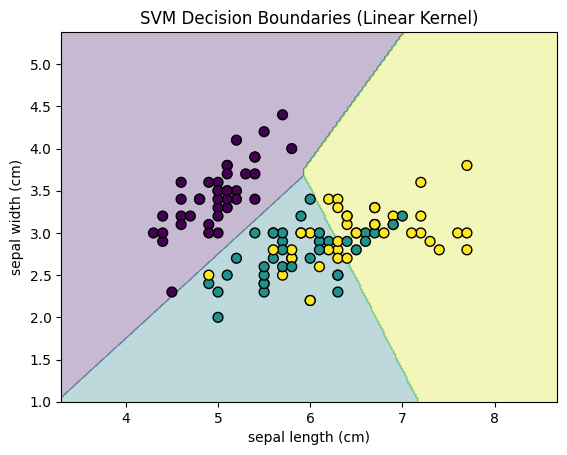

In [9]:
# Step 7: Visualize the Results (optional)
# For visualization, we reduce the features to two dimensions
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Predict the classification of each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create a contour plot of the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# For visualization purposes, let's take only the first two features (sepal length and sepal width)
X_vis = X[:, :2]  # Only the first two features
y_vis = y

# Split the data into training and testing sets again for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Train the SVM model with the reduced dataset
svm_classifier_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier_vis.fit(X_train_vis, y_train_vis)

# Plot the decision boundaries
plot_decision_boundaries(X_train_vis, y_train_vis, svm_classifier_vis, "SVM Decision Boundaries (Linear Kernel)")